---
### "Элементы функционального программирования"
    
---

# Объектно-ориентированные системы

. . .

В R их сразу три:

>- S3 
    + Нет формальной декларации класса
    + Функция может иметь разное поведение (method dispatch) в зависимости от класса
    + Такие функции называются generic
>- S4
    + Строгое определение класса и его полей
    + Больше возможностей для поведения методов
>- Reference classes
. . .


Больше об объектно-ориентированном программировании можно узнать в "Advanced R"

# Generic функции

. . .

Например, функция `print` -- generic:

In [47]:
length(methods(print))

[1] 205

То есть, если `x` -- дата фрейм, то вызовется `print.data.frame(x)`; если `x` -- функция, то `print.function(x)` и так далее

Если ни один из методов не подходит, то `print.default(x)`

. . .


In [48]:
print.data.frame <- function(df) print(dim(df))
print(warpbreaks)

[1] 54  3


# Функции без сторонних эффектов

. . .

В R нет указателей на объекты, все объекты передаются "по значению" (есть нюансы!) 

При попытке изменить переданный объект заводится его копия в локальном окружении (copy-on-modify semantics)


In [61]:
f <- function(k) {
  k <- k + 1
  a <- a + k^2
  a
}
k <- 5
f(k) # oops!

[1] 46

In [62]:
f <- function(k) {
  k <- k + 1
  a <- a + k^2
  a
}
k <- 5

In [63]:
a <- 10
c(f(k), k, a)

[1] 46  5 10

# `replicate`

. . .

Задачи моделирования часто используют вызовы одной и той же функции, зависящей от датчика случайных чисел:
  
. . .

In [52]:
get_status <- function(n, p = 0.1) {
  x <- rbinom(n, 1, p)
  sum(x)
}
replicate(5, get_status(100))

[1] 10 10  4  8  8

# `mapply`

. . .

Многомерная версия `sapply`:

In [53]:
mapply(seq, from = 1:4, to = 2:5, by = 1 / (1 + 1:4))

[[1]]
[1] 1.0 1.5 2.0

[[2]]
[1] 2.000000 2.333333 2.666667 3.000000

[[3]]
[1] 3.00 3.25 3.50 3.75 4.00

[[4]]
[1] 4.0 4.2 4.4 4.6 4.8 5.0

. . .

суть результат вызовов


In [54]:
list(
    seq(1, 2, 1/2), seq(2, 3, 1/3),
    seq(3, 4, 1/4), seq(4, 5, 1/5)
)

[[1]]
[1] 1.0 1.5 2.0

[[2]]
[1] 2.000000 2.333333 2.666667 3.000000

[[3]]
[1] 3.00 3.25 3.50 3.75 4.00

[[4]]
[1] 4.0 4.2 4.4 4.6 4.8 5.0

# `outer`

. . . 

Перебор всевозможных комбинаций аргументов: 


In [64]:
m <- outer(letters, LETTERS, paste0)

In [65]:
dim(m)
diag(m)
m[1:5, 1:5]

[1] 26 26

[1] "aA" "bB" "cC" "dD" "eE" "fF" "gG" "hH" "iI" "jJ" "kK" "lL" "mM" "nN" "oO"
[16] "pP" "qQ" "rR" "sS" "tT" "uU" "vV" "wW" "xX" "yY" "zZ"

aA,aB,aC,aD,aE
bA,bB,bC,bD,bE
cA,cB,cC,cD,cE
dA,dB,dC,dD,dE
eA,eB,eC,eD,eE


# `Vectorize`

. . .

Есть способ векторизовать функцию, которая таковой не является


In [57]:
lp_norm <- function(x, p = 2) {
  if (p >= 1) sum(abs(x)^p)^(1/p) else NaN
}
lp_norm(1:10, -1:4)

Warning message in if (p >= 1) sum(abs(x)^p)^(1/p) else NaN:
"длина условия > 1, будет использован только первый элемент"

[1] NaN

In [58]:
lp_norm <- Vectorize(lp_norm, "p")
lp_norm(1:10, -1:4)

[1]      NaN      NaN 55.00000 19.62142 14.46245 12.61600

# `do.call`

. . .

Вызов функции на списке аргументов:

In [59]:
df1 <- data.frame(id = 1:2, value = rnorm(2))
df2 <- data.frame(id = 3:4, value = runif(2))
df3 <- data.frame(id = 222, value = 7)
do.call(rbind, list(df1, df2, df3)) #rbind(df1, df2, df3)

id,value
1,2.9631101
2,-0.0464780
3,0.8164452
4,0.4646869
222,7.0000000


Но зачем? А для тех случаев, когда объектов неизвестно сколько:

In [ ]:
do.call(rbind, lapply(list.files(), function(f ile) read.csv(file)))

# Глоссарий

. . .

S3, S4, reference classes

Generic function

Copy-on-modify semantics

`?replicate`

`?mapply`

`?outer`

`?Vectorize`

`?do.call`

Один крупный учёный по фамилии Дарвин и имени Чарльз прославился не только своей книгой, название которой вы и без меня знаете, но и обширными трудами по классификациям видов. Благодаря ему мы знаем, что разнообразие признаков в популяции -- один из механизмов, обеспечивающих устойчивость вида.

В рамках исследовательского гранта сотрудники научно-исследовательского института Котологии занялись классификацией признаков сотен котов, котиков и котофеев. После упорного трёхлетнего труда они записали все найденные ими вариации признаков в следующие наборы:
```r
cat_temper <- c("задиристый", "игривый", "спокойный", "ленивый")
cat_color <- c("белый", "серый", "чёрный", "рыжий")
cat_age <- c("кот", "котёнок")
cat_trait <- c("с умными глазами", "с острыми когтями", "с длинными усами")
```
После этого они обратились к вам для составления всеобщего универсального каталога для включения его широко известный рецензируемый журнал "Вестник НИИК". Помогите учёным!

Составьте вектор cat_catalogue, содержащий всевозможные комбинации имеющихся характеристик, и отсортируйте его. Помимо научной ценности, каталог (котолог?) можно использовать как средство для выбора домашнего питомца. Допустим, я хочу завести кота. Тогда я беру случайное число, скажем, 42, и выбираю запись под этим номером. Что за кот мне достался?

Подсказки: 

+ в ответе укажите всю строку без кавычек;
+ порядок комбинирования в точности как список наверху: temper - color - age - trait;
+ cat_catalogue[1] содержит экземпляр задиристый белый кот с длинными усами.


P.S. А если мы бы захотели создать дата фрейм со всевозможными комбинациями, можно было бы использовать функцию expand.grid.

In [127]:
cat_temper <- c("задиристый", "игривый", "спокойный", "ленивый")
cat_color <- c("белый", "серый", "чёрный", "рыжий")
cat_age <- c("кот", "котёнок")
cat_trait <- c("с умными глазами", "с острыми когтями", "с длинными усами")

In [128]:
cat_temper <- sort (cat_temper)
cat_color <- sort (cat_color)
cat_age <- sort(cat_age)
cat_trait <- sort(cat_trait)

In [129]:
cat_catalogue <- expand.grid(cat_temper,cat_color,cat_age,cat_trait)

In [134]:
mapply()

,Var1,Var2,Var3,Var4
42,игривый,серый,кот,с острыми когтями


In [144]:
cat_catalogue <- paste(cat_catalogue$Var1, cat_catalogue$Var2,cat_catalogue$Var3, cat_catalogue$Var4)

In [148]:
sort(cat_catalogue)[42]

[1] "игривый серый котёнок с умными глазами"

-------------------------------------------------------

При помощи функции `simulate_walk` из предыдущего видео можно моделировать случайное блуждание на отрезке [lower, upper]. Это достаточно простой случай. Больший интерес представляют задачи с блужданием по плоскости, то есть в размерности 2.

Возьмите написанную мной функцию и измените её так, чтобы блуждание начиналось в центре координат (0, 0), а все переходы по координатам x и y были бы независимы и имели стандартное нормальное распределение. Если вас пугают эти слова, то это то же самое, что делал я, только отдельно по x и по y.

Процесс обрывается в момент выхода за границу круга с центром в (0, 0) и радиусом 6. Вероятность поглощения на каждом шаге равна 0.01. Максимальное количество шагов — 100. Расстояние, разумеется, евклидово: расстояние от точки (x, y) до (0, 0) есть sqrt(x2+y2). Один шаг процесса подразумевает изменение обеих координат одновременно!

Теперь, когда все параметры зафиксированы, вероятность выхода частицы за пределы круга строго определена. Наша задача — найти эту вероятность. Это некоторое число, не зависящее от реализации алгоритма. Его можно даже вычислить теоретически, но это не так-то просто. Поэтому в подобных случаях пользуются моделированием: запускают алгоритм достаточно большое количество раз (скажем, миллион траекторий) и оценивают долю частиц, вылетевших за границу. Эта доля и есть приближение вероятности, которую мы ищем (реверанс в сторону закона больших чисел).

Для того, чтобы в нашей задаче определить нужную вероятность с точностью до целых процентов, достаточно будет ста тысяч запусков, у меня это несколько секунд. Если у вас считается слишком долго, то грубую оценку можно получить и для десяти тысяч запусков.

В ответе укажите вероятность вылета частицы в процентах, с точностью до целых процентов, в виде XX (например, 14, без указания значка процентов). Вероятность должна получиться больше 50%.

Подсказки:

+ для быстродействия можно не возвращать список, как делаю я, а просто число, например: 1 — поглощение, 2 — вылет за границу, 3 — максимальное число шагов;
+ если вы воспользовались предыдущим советом, то в replicate оставьте simplify = TRUE, тогда результатом будет вектор исходов;
+ если функция получилась совсем медленной, то и тысячи траекторий хватит, чтобы попасть в диапазон правильного ответа плюс-минус пара процентов.

In [161]:
simulate_walk <- function( n_max = 100, p = 0.01, radius = 6) {
  current_position <- c(0,0)
  for (i in 1:n_max) {
      
    is_absorbed <- rbinom(1, 1, p)
      
    if (is_absorbed) return(1)   # 1 - поглощение
      
    current_position <- current_position + c(rnorm(1),rnorm(1))
      
    if (sqrt(current_position[1]**2 + current_position[2]**2 ) > radius) return(2)               #2 - вылет
  }
  return(3)                                                                                      #3 - максимальное кол-во
}

In [170]:
g <- replicate(10000, simulate_walk(),simplify = TRUE)
round(length(g[g==2])/10000 *100)

[1] 81

In [175]:
funs <- c("print","summary","plot")
meths <- lapply(funs, methods)
grepl("matrix", meths)
grepl("function", meths)
grepl("default", meths)

[1] FALSE  TRUE FALSE

[1]  TRUE FALSE  TRUE

[1] TRUE TRUE TRUE

In [188]:
m1 <- function(x, y) {
  m <- matrix(0, length(x), length(y))
  for (i in 1:length(x)) 
    for (j in 1:length(y)) {
      m[i, j] = x[i] * y[j]
    }
  m
}

m2 <- function(x, y) {
  vapply(y, function(i) i * x, numeric(length(x)))
}

m3 <- function(x, y) x %o% y

x <- rnorm(100)
y <- runif(1000)
all.equal(m1(x, y), m2(x, y))
all.equal(m2(x, y), m3(x, y))


[1] TRUE

[1] TRUE

In [192]:
library(microbenchmark) 
p <- microbenchmark(m1(x, y), m2(x, y), m3(x, y))

expr,time
"m3(x, y)",163871
"m1(x, y)",11031023
"m1(x, y)",12902691
"m3(x, y)",130266
"m3(x, y)",113275
"m1(x, y)",12233617
"m3(x, y)",138951
"m3(x, y)",95906
"m1(x, y)",9198246
"m1(x, y)",15873496


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


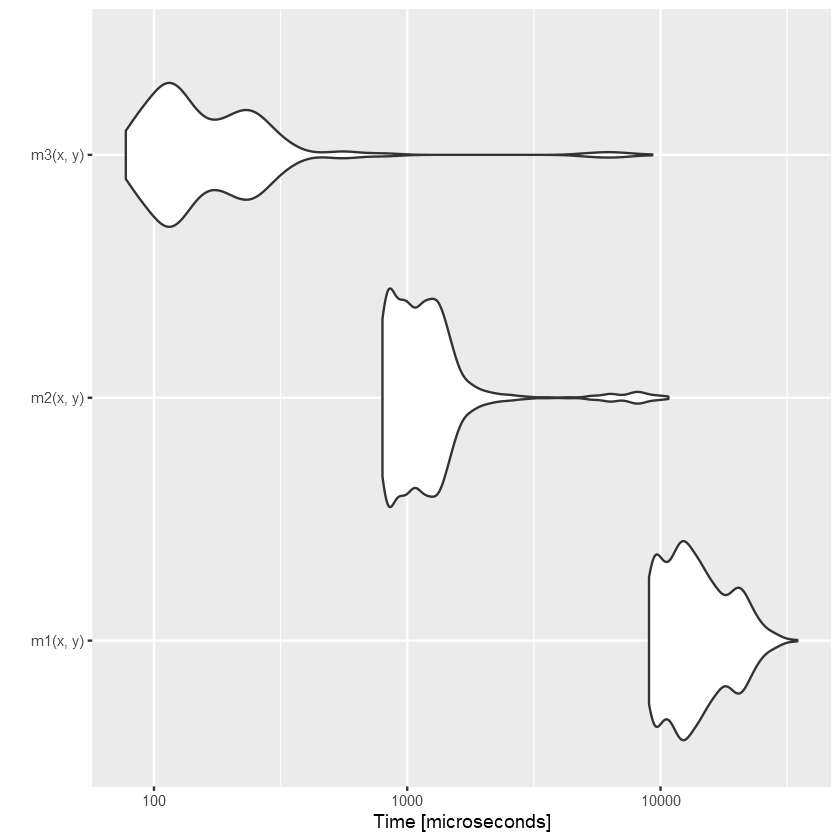

In [202]:
library(microbenchmark)
library(ggplot2)
microbenchmark(m1(x, y), m2(x, y), m3(x, y))
tm <- microbenchmark(m1(x, y),
                    m2(x, y),
                    m3(x, y),times=1000L)
                    
autoplot(tm)

Общий глоссарий для этого урока:

S3, S4, reference classes

Generic function

Copy-on-modify semantics

?replicate

?mapply

?outer

?Vectorize

?do.call